In [1]:
import pandas as pd
import glob
import os
import shutil
import numpy as np
import pickle

Zmazanie aktivít, ktoré majú duplucitné identifikátori - nieje možné určiť spravnosť
aktivít zaznamenavajúcich používanie mapy a aktivity s viacerými dotkymi naraz - črty nevieme extrahovať konzistentne, (future work) 

In [ ]:
path="D:/DP/cont_datasets/extracted/"
#path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]
mapa=[5, 11, 17, 23, 6, 12, 18, 24]
id_counter=0
id_all=0
mistakes =0
user_count=0
for user in users:
    user_count +=1
    print(user_count)
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    
    for season in seasons:
        id_to_delete=[]
        df_activity = pd.read_csv(path+user+season+ "Activity.csv", sep=',', header=None)
        id_all+=len(df_activity[0].unique())
        id_to_delete+=(list(df_activity[df_activity.duplicated([3], keep=False)][0].unique())) #duplicates
        id_to_delete+=list(df_activity.loc[df_activity[9].isin(mapa)][0].unique()) # map aktivity
        
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',', header=None)
        id_to_delete+=list(df_touch.loc[df_touch[3] == 2][2].unique()) #multitouch
        id_to_delete+=list(df_touch.loc[df_touch[10] != 0][2].unique()) #otoceny mobil
        
        id_to_delete = list(set(id_to_delete))
        
        #
        
        df_touch = df_touch.loc[df_touch[2].isin(id_to_delete)==False]

        if len(df_touch)<2:
            shutil.rmtree((path+user+season)[:-1]) 
            continue
            
        df_touch.to_csv(path+user+season + "TouchEvent.csv", encoding='utf-8', index=False, header=False)
        
        df_activity = df_activity.loc[df_activity[0].isin(id_to_delete)==False]
        df_activity.to_csv(path+user+season + "Activity.csv", encoding='utf-8', index=False, header=False)
        
        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',', header=None)
        df_acc = df_acc.loc[df_acc[2].isin(id_to_delete)==False]    
        df_acc.to_csv(path+user+season + "Accelerometer.csv", encoding='utf-8', index=False, header=False)
        
        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',', header=None)
        df_gyro = df_gyro.loc[df_gyro[2].isin(id_to_delete)==False]    
        df_gyro.to_csv(path+user+season + "Gyroscope.csv", encoding='utf-8', index=False, header=False)
        #
        #print(id_to_delete)
        id_counter+= len(id_to_delete)  
    seasons = os.listdir(path+user)
    if len(seasons)==0:
        shutil.rmtree((path+user)[:-1]) 
        

# print(id_all)
# print(id_counter)
# print(mistakes)

Skontrolovanie či má každá aktivita záznamy v touch, acc aj gyro.

In [ ]:
path="D:/DP/cont_datasets/extracted/"
#path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]
mapa=[5, 11, 17, 23, 6, 12, 18, 24]
id_counter=0
id_all=0
mistakes =0
user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    
    for season in seasons:
        id_to_delete=[]
        df_activity = pd.read_csv(path+user+season+ "Activity.csv", sep=',', header=None)
        
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',', header=None)
        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',', header=None)    
        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',', header=None)    
        
        ids_act=list(df_activity[0].unique())
        ids_touch=list(df_touch[2].unique())
        ids_acc=list(df_acc[2].unique())
        ids_gyro=list(df_gyro[2].unique())

        temps = ids_act.copy()
        for temp in temps:
            if temp in ids_act and temp in ids_touch and temp in ids_acc and temp in ids_gyro:
                ids_act.remove(temp)
                ids_touch.remove(temp)
                ids_acc.remove(temp)
                ids_gyro.remove(temp)
        
        df_activity = df_activity.loc[df_activity[0].isin(ids_act)==False]
        if len(df_activity)==0:
            shutil.rmtree((path+user+season)[:-1]) 
            continue
        df_activity.to_csv(path+user+season + "Activity.csv", encoding='utf-8', index=False, header=False)
        
        df_touch = df_touch.loc[df_touch[2].isin(ids_touch)==False]
        if len(df_touch)<2:
            shutil.rmtree((path+user+season)[:-1]) 
            continue
        df_touch.to_csv(path+user+season + "TouchEvent.csv", encoding='utf-8', index=False, header=False)
        
        df_acc = df_acc.loc[df_acc[2].isin(ids_acc)==False]
        if len(df_acc)<2:
            shutil.rmtree((path+user+season)[:-1]) 
            continue
        df_acc.to_csv(path+user+season + "Accelerometer.csv", encoding='utf-8', index=False, header=False)
        
        df_gyro = df_gyro.loc[df_gyro[2].isin(ids_gyro)==False]
        if len(df_gyro)<2:
            shutil.rmtree((path+user+season)[:-1]) 
            continue
        df_gyro.to_csv(path+user+season + "Gyroscope.csv", encoding='utf-8', index=False, header=False)
    seasons = os.listdir(path+user)
    if len(seasons)==0:
        shutil.rmtree((path+user)[:-1]) 


Skontrolovanie ci ma každá aktvita aspoň dva záznami v každom súbore (minimálne z dvoch vieme extrahovať črty)

In [ ]:
path="D:/DP/cont_datasets/extracted/"
#path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]
mapa=[5, 11, 17, 23, 6, 12, 18, 24]
id_counter=0
id_all=0
mistakes =0
user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    
    for season in seasons:
        id_to_delete=[]
        df_activity = pd.read_csv(path+user+season+ "Activity.csv", sep=',', header=None)
        
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',', header=None)
        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',', header=None)    
        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',', header=None)    
        
        ids_act=list(df_activity[0].unique())


        for id_act in ids_act:
            if df_touch[df_touch[2] == id_act].shape[0] < 2:
                print("t"+str(user))
            
            if df_acc[df_acc[2] == id_act].shape[0] < 2:
                print("a"+str(user))
                
            if df_gyro[df_gyro[2] == id_act].shape[0] < 2:
                print("g"+str(user))
        


Pridanie názvu stlpcov a spojenie s identifikátormi aktivty 

In [ ]:
path="D:/DP/cont_datasets/extracted/"
#path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]

user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    
    for season in seasons:
        id_to_delete=[]
        df_activity = pd.read_csv(path+user+season+ "Activity.csv", sep=',', header=None)
        df_activity.columns = ['activity_id', 'subject_id','session_number','start_time','end_time','relative_start_time','relative_end_time','gesture_scenario','task_id', "content_id"]
        df_activity = df_activity.loc[:,~df_activity.columns.str.contains('time', case=False)] 
        
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',', header=None)
        df_touch.columns = ['systime','event_time','activity_id','pointer_count','pointer_id','action_id','x','y','pressure','contact_size','phone_orientation']
        df_touch = pd.merge(df_touch, df_activity, on="activity_id").sort_values('systime')
        df_touch.to_csv(path+user+season + "TouchEvent.csv", encoding='utf-8', index=False)

        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',', header=None) 
        df_acc.columns = ['systime','event_time','activity_id','x','y','z','phone_orientation']
        df_acc = pd.merge(df_acc,df_activity, on="activity_id").sort_values('systime')
        df_acc.to_csv(path+user+season + "Accelerometer.csv", encoding='utf-8', index=False)

        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',', header=None)    
        df_gyro.columns = ['systime','event_time','activity_id','x','y','z','phone_orientation']
        df_gyro = pd.merge(df_gyro,df_activity, on="activity_id").sort_values('systime')
        df_gyro.to_csv(path+user+season + "Gyroscope.csv", encoding='utf-8', index=False)

        os.remove(path+user+season+ "Activity.csv")
 
        

Skontrolovanie či každá dotyková akcia ma začiatok a koniec - hľadanie párov

In [ ]:
path="D:/DP/cont_datasets/extracted/"
#path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]

user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    
    for season in seasons:

        
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',')
        df_touch.loc[df_touch['action_id'] == 5, 'action_id'] = 0
        df_touch.loc[df_touch['action_id'] == 6, 'action_id'] = 1
        last_zero=0 
        last=1
        bola_zrada=True
        bude_vypis=False
        while (bola_zrada):
            bola_zrada=False
            last_zero=0
            last=1
            for index in range(len(df_touch)):
                if last == df_touch.iloc[index]['action_id'] or df_touch.iloc[index]['action_id']<0 or df_touch.iloc[index]['action_id']>2:
                    print('zrada')
                    print(path+user+season)
                    print("row: "+str(index))
#                     print(last)
                    bola_zrada=True
                    bude_vypis=True
                    #find 1
                    index_of_second_zero=None
                    for index2 in range(index+1, len(df_touch)):
                        if df_touch.iloc[index2]['action_id']==0:
                            index_of_second_zero=index2
                            break
                    break    
                if index ==  len(df_touch)-1 and df_touch.iloc[index]['action_id'] != 1:
                    
                    print("zrada na konci")
                    index_of_second_zero = index+1
                    bude_vypis=True
                    bola_zrada = True
                    break
                if not bola_zrada and df_touch.iloc[index]['action_id'] == 0:
                    last_zero=index
                if df_touch.iloc[index]['action_id'] == 0 or df_touch.iloc[index]['action_id'] == 1:
                    last = df_touch.iloc[index]['action_id']
                    
            if bola_zrada:
                df_touch=df_touch.drop(df_touch.index[last_zero:index_of_second_zero]).reset_index(drop=True)
        if bude_vypis:
            df_touch.to_csv(path+user+season + "TouchEvent.csv", encoding='utf-8', index=False)
            print("Vyriesene")  
            print('-------------------')

Skontrolovanie správnej dlžky timestamp

In [ ]:
#path="D:/DP/cont_datasets/extracted/"
path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]

user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    
    for season in seasons:

        
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',')
        for i in range(len(df_touch)):
            if int(math.log10(df_touch.iloc[i].systime))+1 != 13:
                print(path+user+season)
                print ('trow'+str(i))


        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',') 
        for i in range(len(df_acc)):
            if int(math.log10(df_acc.iloc[i].systime))+1 != 13:
                print(path+user+season)
                print ('arow'+str(i))



        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',')    
        for i in range(len(df_gyro)):
            if int(math.log10(df_gyro.iloc[i].systime))+1 != 13:
                print(path+user+season)
                print ('grow'+str(i))


Pridanie nových stĺpcov
username 
pattern_id -označuje unikatnu dotykovú akciu -  nastavenie defaultnej hodnoty, ktora ak nebude zmenena zaznamy sa zmazu
segment - stlpec pre zachovanie tvaru dátovej množiny zo vstupnej autentifikácie - nebude vyuźitý 

In [ ]:
path="D:/DP/cont_datasets/extracted/"
#path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]

user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    
    for season in seasons:

        
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',')
        df_touch['username'] = user[:-1]
        df_touch['pattern_id'] = -1
        df_touch['segment'] = 0
        df_touch.to_csv(path+user+season + "TouchEvent.csv", encoding='utf-8', index=False)

        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',') 
        df_acc['username'] = user[:-1]
        df_acc['pattern_id'] = -1
        df_acc['segment'] = 0
        df_acc.to_csv(path+user+season + "Accelerometer.csv", encoding='utf-8', index=False)

        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',')    
        df_gyro['username'] = user[:-1]
        df_gyro['pattern_id'] = -1
        df_gyro['segment'] = 0
        df_gyro.to_csv(path+user+season + "Gyroscope.csv", encoding='utf-8', index=False)

        

Spárovanie záznamov podľa systime unikátných dotykových akcií - zaznamy bez dotykovej akcie su zmazané

In [ ]:
path="D:/DP/cont_datasets/extracted/"
#path="./extracted/"

users = os.listdir(path)
users = [ user + "/" for user in users]

user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    patter_id = 1
    for season in seasons:

        pattern_start_timestamp = None
        pattern_end_timestamp = None

        last_acc_index=0
        last_gyro_index=0
        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',')
        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',') 
        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',') 

        for i in range(len(df_touch)):
            df_touch.loc[i,'pattern_id'] = patter_id  
            if df_touch.iloc[i]['action_id'] == 0:
                pattern_start_timestamp = df_touch.iloc[i]['systime']
                continue
            if df_touch.iloc[i]['action_id'] == 2:
                continue    
            if df_touch.iloc[i]['action_id'] == 1:
                pattern_end_timestamp = df_touch.iloc[i]['systime']
                
                for a in range(last_acc_index,len(df_acc)):
                    last_acc_index = a
                    if df_acc.iloc[a]['systime'] >= pattern_start_timestamp and df_acc.iloc[a]['systime'] <= pattern_end_timestamp:
                        df_acc.loc[a,'pattern_id'] = patter_id
                    if df_acc.iloc[a]['systime'] > pattern_end_timestamp:
                        break

                for a in range(last_gyro_index,len(df_gyro)):
                    last_gyro_index = a
                    if df_gyro.iloc[a]['systime'] >= pattern_start_timestamp and df_gyro.iloc[a]['systime'] <= pattern_end_timestamp:
                        df_gyro.loc[a,'pattern_id'] = patter_id
                    if df_gyro.iloc[a]['systime'] > pattern_end_timestamp:
                        break

                patter_id += 1

        df_touch.to_csv(path+user+season + "TouchEvent.csv", encoding='utf-8', index=False)
        df_acc = df_acc.loc[df_acc['pattern_id'] != -1]
        df_acc.to_csv(path+user+season + "Accelerometer.csv", encoding='utf-8', index=False)
        df_gyro = df_gyro.loc[df_gyro['pattern_id'] != -1]
        df_gyro.to_csv(path+user+season + "Gyroscope.csv", encoding='utf-8', index=False)


Spojenie záznamov všetkých používateľov do spoločných súborov

In [ ]:
path="D:/DP/cont_datasets/extracted/"
path_to_save = "D:/DP/cont_datasets/merged/"
# path="./extracted/"
# path_to_save = "./merged/"
users = os.listdir(path)
users = [ user + "/" for user in users]
final_df_touch=pd.DataFrame()
final_df_acc=pd.DataFrame()
final_df_gyro=pd.DataFrame()

user_count=0
for user in users:
    user_count +=1
    print(user_count)
    
    seasons = os.listdir(path+user)
    seasons = [ season + "/" for season in seasons]
    for season in seasons:

        df_touch = pd.read_csv(path+user+season+ "TouchEvent.csv", sep=',')
        final_df_touch = final_df_touch.append(df_touch)
        
        df_acc = pd.read_csv(path+user+season+ "Accelerometer.csv", sep=',')
        final_df_acc = final_df_acc.append(df_acc) 

        df_gyro = pd.read_csv(path+user+season+ "Gyroscope.csv", sep=',')
        final_df_gyro = final_df_gyro.append(df_gyro) 

final_df_touch.to_csv(path_to_save + "touch.csv", encoding='utf-8', index=False)
final_df_acc.to_csv(path_to_save + "accelerometer.csv", encoding='utf-8', index=False)
final_df_gyro.to_csv(path_to_save + "gyroscope.csv", encoding='utf-8', index=False)



In [ ]:
Pre zachovanie tvaru predchádzajúceho datasetu je aktivita čítania premenovaná na scenario_show_complex a aktivita písania scenario_show_simple

In [ ]:
path = "D:/DP/cont_datasets/merged/"
reading=[1, 7, 13, 19, 2, 8, 14, 20] # complex

df_touch = pd.read_csv(path+ "touch.csv", sep=',')
df_touch['scenario'] = np.where(df_touch['task_id'].isin(reading), 'scenario_show_complex', 'scenario_show_simple')
df_touch["device"] = df_touch["gesture_scenario"].astype(str) + df_touch["subject_id"].astype(str)
df_touch.to_csv(path + "touch.csv", encoding='utf-8', index=False)

df_acc = pd.read_csv(path+ "accelerometer.csv", sep=',')
df_acc['scenario'] = np.where(df_acc['task_id'].isin(reading), 'scenario_show_complex', 'scenario_show_simple')
df_acc["device"] = df_acc["gesture_scenario"].astype(str) + df_acc["subject_id"].astype(str) 
df_acc.to_csv(path + "accelerometer.csv", encoding='utf-8', index=False)

df_gyro = pd.read_csv(path+ "gyroscope.csv", sep=',')
df_gyro['scenario'] = np.where(df_gyro['task_id'].isin(reading), 'scenario_show_complex', 'scenario_show_simple')
df_gyro["device"] = df_gyro["gesture_scenario"].astype(str) + df_gyro["subject_id"].astype(str) 
df_gyro.to_csv(path + "gyroscope.csv", encoding='utf-8', index=False)

zmazanie používatelov s malým množstvom záznamov

In [ ]:

path = "D:/DP/cont_datasets/merged/"

users_to_delete = [737973,815316]

df_touch = pd.read_csv(path+ "touch.csv", sep=',')
df_touch=df_touch.loc[df_touch['username'].isin(users_to_delete)==False ]
df_touch.to_csv(path + "touch.csv", encoding='utf-8', index=False)

df_acc = pd.read_csv(path+ "accelerometer.csv", sep=',')
df_acc=df_acc.loc[df_acc['username'].isin(users_to_delete)==False ]
df_acc.to_csv(path + "accelerometer.csv", encoding='utf-8', index=False)

df_gyro = pd.read_csv(path+ "gyroscope.csv", sep=',')
df_gyro=df_gyro.loc[df_gyro['username'].isin(users_to_delete)==False ]
df_gyro.to_csv(path + "gyroscope.csv", encoding='utf-8', index=False)

Premenovanie systime na timestamp pre zachovanie tvaru

In [ ]:
path = "D:/DP/cont_datasets/merged/"


df_touch = pd.read_csv(path+ "touch.csv", sep=',')
df_touch=df_touch.rename({'systime': 'timestamp'}, axis=1)
df_touch.to_csv(path + "touch.csv", encoding='utf-8', index=False)

df_acc = pd.read_csv(path+ "linear_accelerometer.csv", sep=',')
df_acc=df_acc.rename({'systime': 'timestamp'}, axis=1)
df_acc.to_csv(path + "linear_accelerometer.csv", encoding='utf-8', index=False)

df_gyro = pd.read_csv(path+ "gyroscope.csv", sep=',')
df_gyro=df_gyro.rename({'systime': 'timestamp'}, axis=1)
df_gyro.to_csv(path + "gyroscope.csv", encoding='utf-8', index=False)

pridanie znaku do username - je potrebne aby bol v stĺpci string

In [ ]:
path = 'D:/DP/cont_features/paterns_nan/imputed/'

df_raw_train = pd.read_csv(path  + "train.csv", sep=',')
df_raw_val = pd.read_csv(path  + "val.csv", sep=',')
df_raw_test = pd.read_csv(path + "test.csv", sep=',')

df_raw_train['username'] = "'" + df_raw_train['username'].astype(str)
df_raw_val['username'] = "'" + df_raw_val['username'].astype(str)
df_raw_test['username'] = "'" + df_raw_test['username'].astype(str)

df_raw_train.to_csv(path + "train.csv", encoding='utf-8', index=False)
df_raw_val.to_csv(path + "val.csv", encoding='utf-8', index=False)
df_raw_test.to_csv(path + "test.csv", encoding='utf-8', index=False)

-----------------------------
#Testy

In [2]:
path = 'D:/DP/cont_features/paterns_nan/imputed/'

df_raw_train = pd.read_csv(path  + "train.csv", sep=',')
df_raw_val = pd.read_csv(path  + "val.csv", sep=',')
df_raw_test = pd.read_csv(path + "test.csv", sep=',')

74


<AxesSubplot:xlabel='username'>

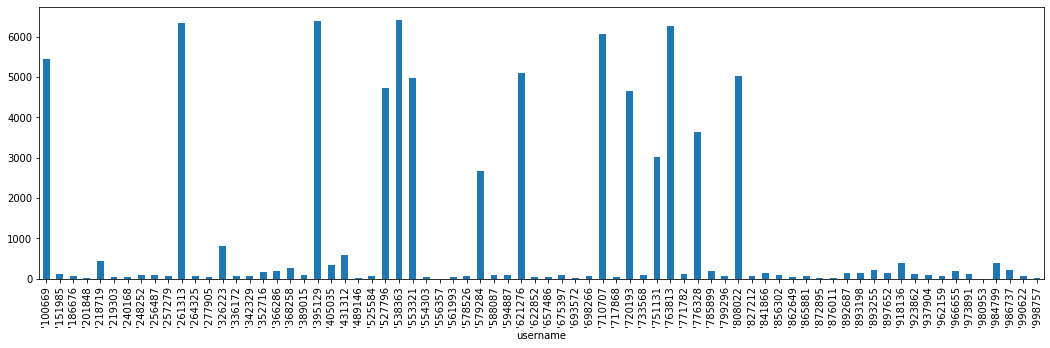

In [4]:
temp = df_raw_train.loc[df_raw_train['scenario'] == 'scenario_show_simple']
print(len(temp['username'].unique()))
group = temp.groupby('username')['pattern_id'].nunique()
group.plot.bar(figsize=(18,5))

76


<AxesSubplot:xlabel='username'>

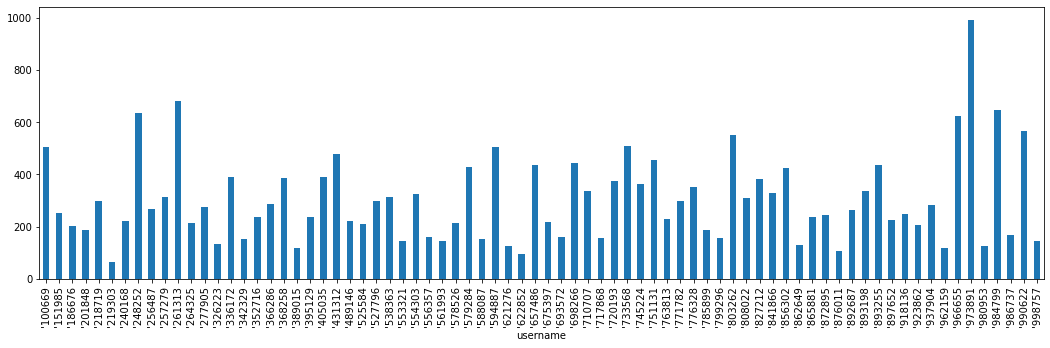

In [5]:
temp = df_raw_train.loc[df_raw_train['scenario'] == 'scenario_show_complex']
print(len(temp['username'].unique()))
group = temp.groupby('username')['pattern_id'].nunique()
group.plot.bar(figsize=(18,5))

In [10]:
path = 'D:/DP/cont_features/paterns_nan/all_feautures.csv'

df_raw_all = pd.read_csv(path, sep=',')

151907


<AxesSubplot:xlabel='username'>

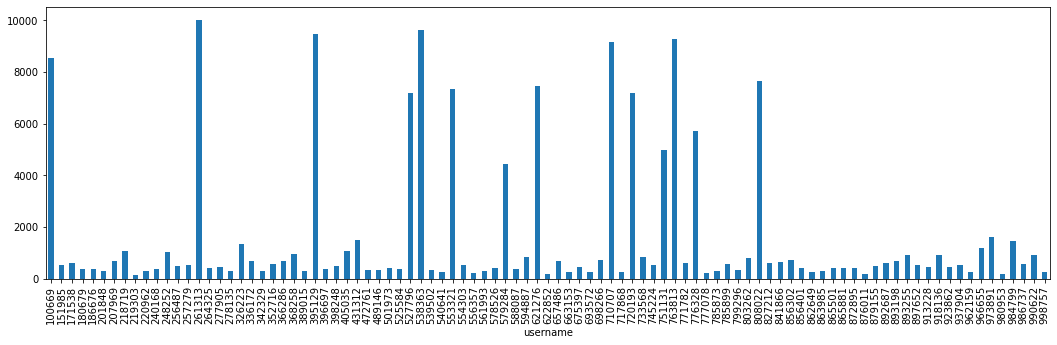

In [13]:
print(len(df_raw_all))
group = df_raw_all.groupby('username')['pattern_id'].nunique()
group.plot.bar(figsize=(18,5))

In [14]:
df_filtered = df_raw_all.groupby('username').filter(lambda x : len(x)<1000).reset_index(drop=True)

In [15]:
df_filtered

,user,duration,length,start_x,start_y,velocity_x_mean,velocity_x_std,velocity_x_min,velocity_x_max,velocity_x_abs_min,...,gyro_y_z_median,gyro_y_z_upper_q,gyro_y_z_max,gyro_x_y_z_mean,gyro_x_y_z_std,gyro_x_y_z_min,gyro_x_y_z_lower_q,gyro_x_y_z_median,gyro_x_y_z_upper_q,gyro_x_y_z_max
0,42,675,214.153920,709.0,1299.0,0.175099,0.188636,0.000000,1.170369,0.0,...,0.048372,0.065057,0.128287,0.058585,0.027339,0.016996,0.040295,0.053079,0.068065,0.128658
1,48,1034,317.576686,305.0,1492.0,-0.090207,0.063317,-0.229212,0.000000,0.0,...,0.048355,0.061534,0.111792,0.066135,0.025363,0.012354,0.049626,0.065060,0.083108,0.125677
2,49,2017,477.258222,645.0,187.0,-0.073275,0.075440,-0.273091,0.000529,0.0,...,0.055184,0.100439,0.520750,0.160909,0.186896,0.013853,0.049738,0.079444,0.154525,0.768932
3,56,950,659.368799,707.0,704.0,0.021340,0.050938,-0.164522,0.181818,0.0,...,0.044328,0.074469,0.185025,0.073549,0.054914,0.008536,0.037255,0.051460,0.081158,0.219260
4,57,100,0.000000,643.0,988.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.188418,0.263810,0.342728,0.262472,0.078531,0.146002,0.206358,0.255095,0.328246,0.365350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33748,151813,47,9.433981,834.0,208.0,0.119048,0.206197,0.000000,0.357143,0.0,...,0.068480,0.071724,0.118437,0.120461,0.048676,0.070065,0.072747,0.131357,0.144843,0.183292
33749,151815,413,186.663804,907.0,1432.0,0.014136,0.033451,-0.042300,0.103402,0.0,...,0.253474,0.408519,0.552684,0.300806,0.146510,0.131485,0.163725,0.253492,0.428626,0.554682
33750,151816,539,448.136082,852.0,1408.0,-0.010707,0.099591,-0.201712,0.204370,0.0,...,0.275912,0.660431,0.749126,0.379619,0.240593,0.047652,0.135006,0.354791,0.667543,0.754784
33751,151819,6513,448.991388,794.0,1449.0,0.013878,0.066119,-0.156773,0.418766,0.0,...,0.457944,0.751459,1.776142,0.647211,0.355855,0.080498,0.378965,0.566144,0.863113,1.779301


33753


<AxesSubplot:xlabel='username'>

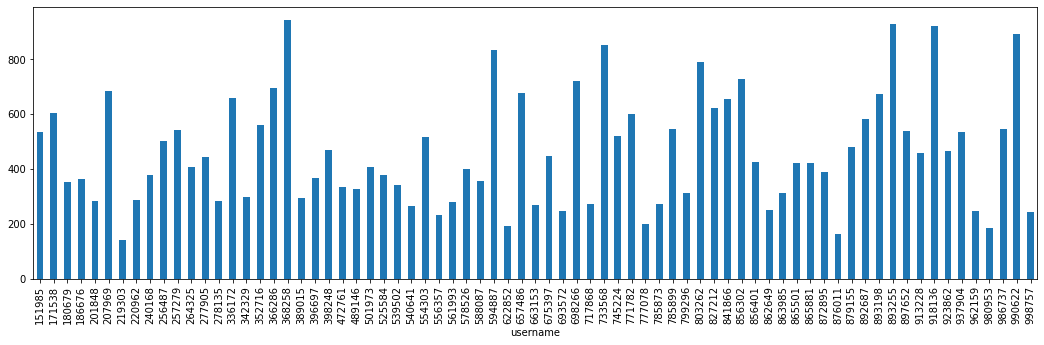

In [16]:

group = df_filtered.groupby('username')['pattern_id'].nunique()
print(len(df_filtered))
group.plot.bar(figsize=(18,5))

In [2]:
file = open("D:/DP/source/packages/config/selected_features_cont.pickle", 'rb')
SELECTED_FEATURES_DICT2 = pickle.load(file)
file.close()

In [5]:
SELECTED_FEATURES_DICT2['20_RandomForestClassifierWithCoef(min_samples_leaf=5, n_estimators=500, n_jobs=-1)']

['duration',
 'length',
 'start_x',
 'start_y',
 'accelerometer_jerk_x_y_median',
 'accelerometer_jerk_x_z_lower_q',
 'accelerometer_x_min',
 'accelerometer_x_lower_q',
 'accelerometer_x_max',
 'accelerometer_y_mean',
 'accelerometer_y_max',
 'accelerometer_x_y_lower_q',
 'accelerometer_x_z_std',
 'accelerometer_x_z_min',
 'accelerometer_x_z_lower_q',
 'accelerometer_y_z_mean',
 'accelerometer_x_y_z_mean',
 'accelerometer_x_y_z_upper_q',
 'gyro_y_std',
 'gyro_x_y_mean']